In [20]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [21]:
def cft(x, t, f):
    X = np.zeros(len(f), dtype=complex)
    for i, freq in enumerate(f):
        X[i] = np.trapz(x * np.exp(-1j * 2 * np.pi * freq * t), t)
    return X    

In [22]:
# parâmetros do sinal

# arquivo de áudio wav
taxaAmostragem, audioExemplo = wav.read("bib.wav")

# converte de estereo para mono
if len(audioExemplo.shape) == 2:
    audioExemplo = audioExemplo.mean(axis=1)

# duração do sinal (s)
duracao = len(audioExemplo) / taxaAmostragem

# vetor de tempo
t = np.linspace(0, duracao, len(audioExemplo), endpoint=False)

# frequências do sinal (hz)
frequenciasCft = np.linspace(0, taxaAmostragem, len(t))

In [23]:
# cft do sinal de áudio
cftResultado = cft(audioExemplo, t, frequenciasCft)

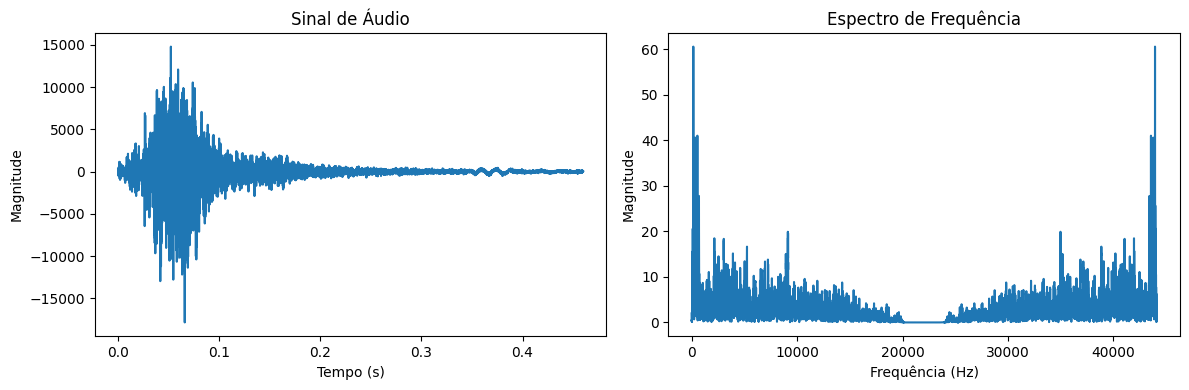

In [24]:
# plot do sinal de audio
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, audioExemplo)
plt.title("Sinal de Áudio")
plt.xlabel("Tempo (s)")
plt.ylabel("Magnitude")

# plot do espectro de frequência |cft|
plt.subplot(1, 2, 2)
plt.plot(frequenciasCft, np.abs(cftResultado))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()